*22 July 2024 : 21BAI1133 - Mukundh J*
#  Speech and Natural Language Processing Lab 3
Task:

- Download and explore an Indic Corpus.
- While you download,
    - Practice exploring the Brown corpus in NLTK.
    - Learn how to create your own corpus by importing data.
- Once downloaded,
    - Write down few salient features of the corpus
        - purpose for which it was created
        - features of the corpus
        - How it is different from other corpora
        - So on ..
    - Explore the corpus.
        - What kind of text?
        - What kind of meta data - genre, language, category, tags, gender, age?
    - Get statistics about the text data in the corpus (based on our discussion in class).
- Helpful Link: https://github.com/AI4Bharat/indicnlp_catalog

## Indic NLP exploration

In [1]:
!pip install indic-nlp-library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.7/572.7 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.7 MB/s eta 0:00:00
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.16.1
    Uninstalling Pygments-2.16.1:
      Successfully uninstalled Pygments-2.16.1
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2
ERROR: pip's dependency resolver does not currently 

More resources: https://nbviewer.org/url/anoopkunchukuttan.github.io/indic_nlp_library/doc/indic_nlp_examples.ipynb

In [2]:
import nltk
from collections import Counter, defaultdict
import regex as re
from indicnlp.tokenize import indic_tokenize
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Using the Kangri corpus from Indic NLP, which is a monolingual corpus of Himachali low resource endangered language, Kangri comprising of 1,81,552 sentences.



In [3]:
!git clone https://github.com/chauhanshweta/Kangri_corpus.git

Cloning into 'Kangri_corpus'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 53 (delta 22), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (53/53), 7.64 MiB | 2.87 MiB/s, done.
Resolving deltas: 100% (22/22), done.


* Kr_1 represent the kangri monolingual dataset which conatin the books collected from various short/long stories and novels. Apart from books we have also compiled the monolingual data by including conversations from various WhatsApp and Facebook groups.

* Kr_2 represnt Hindi-Kangri dictionary words.

* Kr_3 represnt the Kavitaiyein, Lok-Geet and kangri Gazals written by various kangri authors.

* Kr_4 represnt the Parallel Hindi-Kangri dataset that has been created by distributing different everyday topics to kangri writers. Some of the categories are as follows: Hospital, Defense, Media, School, Music, Sports, Dance, Food, Parties, Law, Market, Marriage, Culture, History, Education, Technology, Religion, Stories.
Kr_4 is categrized Kr_4_Hindi and Kr_4_kangri


We will use Kr_4_Hindi for better understanding


In [4]:
with open('/content/Kangri_corpus/train dataset/Kr_4_Hindi.txt', 'r', encoding='utf-8') as file:
    text = file.read()

In [5]:
words = indic_tokenize.trivial_tokenize(text, lang='ta')

In [6]:
total_tokens = len(words)
unique_tokens = len(set(words))
type_token_ratio = unique_tokens / total_tokens

print(f'Total Tokens: {total_tokens}')
print(f'Unique Tokens: {unique_tokens}')
print(f'Type-Token Ratio: {type_token_ratio:.4f}')

Total Tokens: 323080
Unique Tokens: 28737
Type-Token Ratio: 0.0889


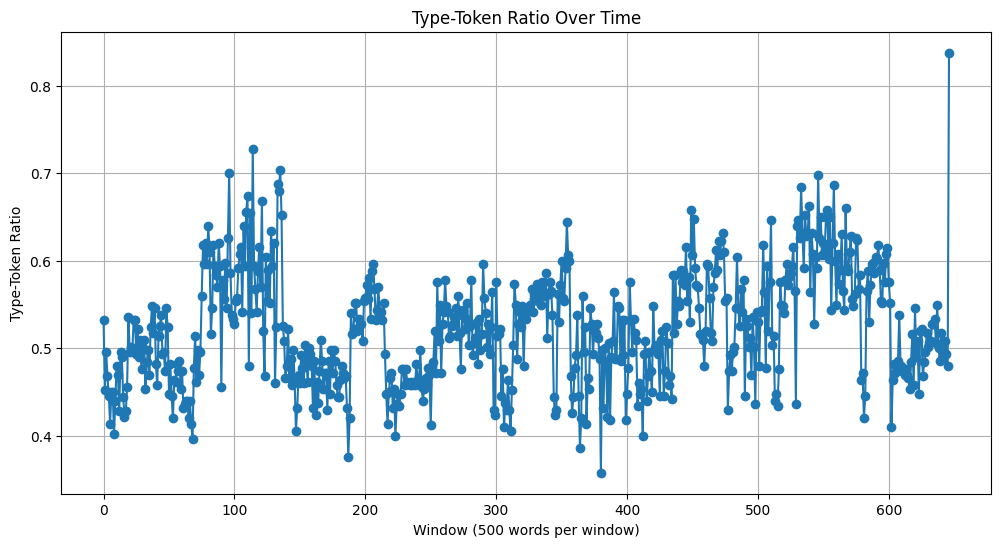

In [7]:
window_size = 500
type_token_ratios = []

for i in range(0, len(words), window_size):
    window = words[i:i + window_size]
    total_tokens_window = len(window)
    unique_tokens_window = len(set(window))
    if total_tokens_window > 0:
        type_token_ratio_window = unique_tokens_window / total_tokens_window
        type_token_ratios.append(type_token_ratio_window)

# Plotting Type-Token Ratio
plt.figure(figsize=(12, 6))
plt.plot(type_token_ratios, marker='o')
plt.title('Type-Token Ratio Over Time')
plt.xlabel('Window (500 words per window)')
plt.ylabel('Type-Token Ratio')
plt.grid(True)
plt.show()

In [8]:
word_counts = []
unique_counts = []
seen_words = set()

for i, word in enumerate(words):
    seen_words.add(word)
    word_counts.append(i + 1)
    unique_counts.append(len(seen_words))

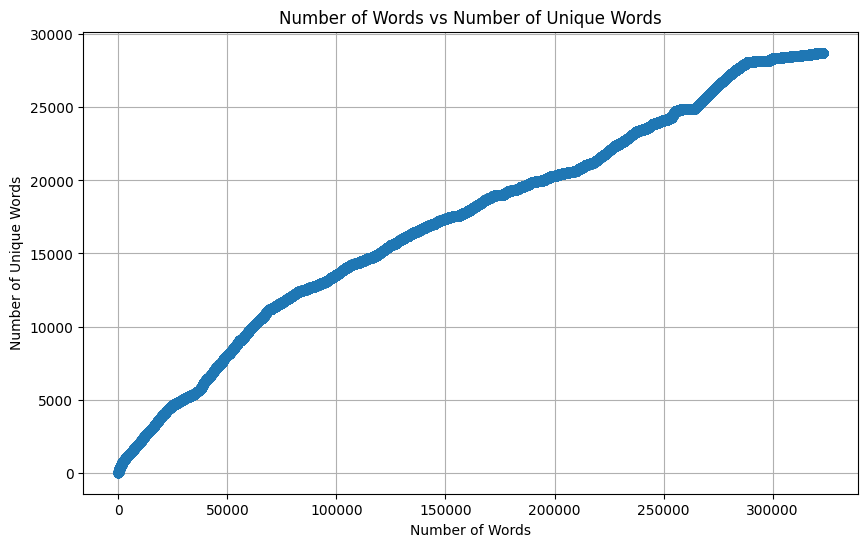

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(word_counts, unique_counts, marker='o', linewidth=0.01)
plt.xlabel('Number of Words')
plt.ylabel('Number of Unique Words')
plt.title('Number of Words vs Number of Unique Words')
plt.grid(True)
plt.show()

In [10]:
def split_syllables(word):
    return re.findall(r'\X', word, re.U)

# Syllable Analysis
syllables = [syllable for word in words for syllable in split_syllables(word)]

In [11]:
# Count syllable frequencies
syllable_freq = Counter(syllables)

# Most Frequent Syllables
most_frequent_syllables = syllable_freq.most_common(10)

# Syllable positions in words
initial_syllables = defaultdict(int)
medial_syllables = defaultdict(int)
final_syllables = defaultdict(int)

In [12]:
for word in words:
    sylls = split_syllables(word)
    if sylls:
        initial_syllables[sylls[0]] += 1
        if len(sylls) > 1:
            final_syllables[sylls[-1]] += 1
        for syll in sylls[1:-1]:
            medial_syllables[syll] += 1

In [13]:
print('\nMost Frequent Syllables:')
for syllable, freq in most_frequent_syllables:
    print(f'{syllable}: {freq}')


Most Frequent Syllables:
र: 37902

: 27220
क: 22020
न: 15914
स: 15599
प: 15578
ह: 13202
ल: 12728
।: 11635
ब: 11505


In [14]:
most_frequent_initial_syllables = sorted(initial_syllables.items(), key=lambda x: x[1], reverse=True)[:10]
initial_labels, initial_counts = zip(*most_frequent_initial_syllables)


most_frequent_medial_syllables = sorted(medial_syllables.items(), key=lambda x: x[1], reverse=True)[:10]
medial_labels, medial_counts = zip(*most_frequent_medial_syllables)

most_frequent_final_syllables = sorted(final_syllables.items(), key=lambda x: x[1], reverse=True)[:10]
final_labels, final_counts = zip(*most_frequent_final_syllables)

In [15]:
print('\nMost Frequent Syllables:')
for syllable, freq in most_frequent_syllables:
    print(f'{syllable}: {freq}')

print('\nMost Frequent Initial Syllables:')
for syllable, freq in most_frequent_initial_syllables:
    print(f'{syllable}: {freq}')

print('\nMost Frequent Medial Syllables:')
for syllable, freq in most_frequent_medial_syllables:
    print(f'{syllable}: {freq}')

print('\nMost Frequent Final Syllables:')
for syllable, freq in most_frequent_final_syllables:
    print(f'{syllable}: {freq}')


Most Frequent Syllables:
र: 37902

: 27220
क: 22020
न: 15914
स: 15599
प: 15578
ह: 13202
ल: 12728
।: 11635
ब: 11505

Most Frequent Initial Syllables:

: 19289
।: 11635
क: 10576
है: 8042
प: 7947
आ: 6687
अ: 6505
ब: 6437
के: 6186
उ: 5818

Most Frequent Medial Syllables:
र: 8349

: 6176
स: 5970
क: 5794
प: 5573
ह: 4707
म: 3606
र्: 3485
ल: 3304
न: 3121

Most Frequent Final Syllables:
र: 25047
ने: 8566
न: 7232
या: 6529
त: 6434
ह: 6244
ता: 5963
क: 5650
ल: 5430
म: 4623


In [16]:
!sudo apt-get install fonts-noto

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core
  fonts-noto-extra fonts-noto-mono fonts-noto-ui-core fonts-noto-ui-extra
  fonts-noto-unhinted
The following NEW packages will be installed:
  fonts-noto fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji
  fonts-noto-core fonts-noto-extra fonts-noto-mono fonts-noto-ui-core
  fonts-noto-ui-extra fonts-noto-unhinted
0 upgraded, 10 newly installed, 0 to remove and 45 not upgraded.
Need to get 317 MB of archives.
After this operation, 789 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-core all 20201225-1build1 [12.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-noto all 20201225-1build1 [16.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:

In [17]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font = fm.FontProperties(fname='/usr/share/fonts/truetype/noto/NotoSansDevanagariUI-Regular.ttf')

def plot_bar(labels, counts, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    plt.bar(labels, counts)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(fontproperties=font)
    plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


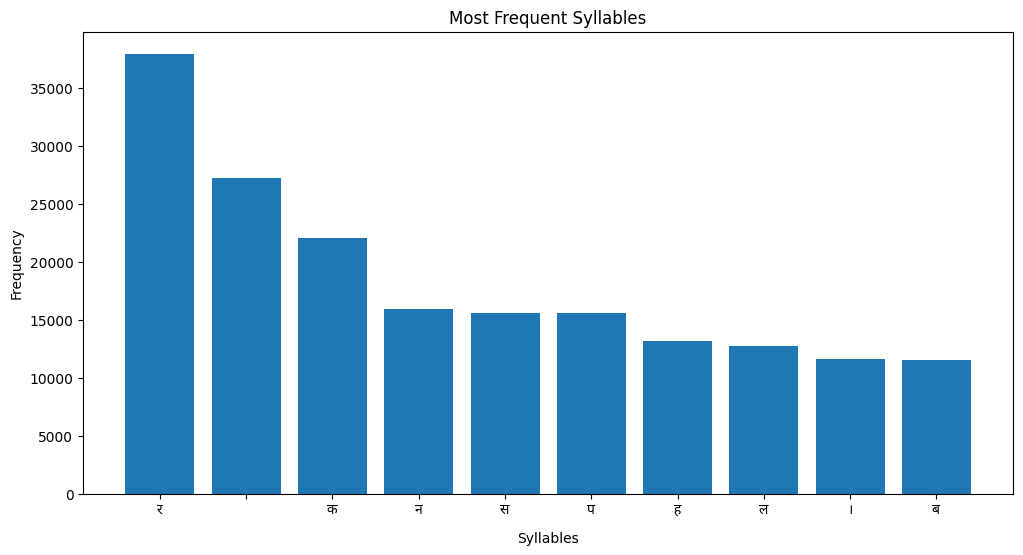

In [18]:
# Plotting Most Frequent Syllables
syllable_labels, syllable_counts = zip(*most_frequent_syllables)
plot_bar(syllable_labels, syllable_counts, 'Most Frequent Syllables', 'Syllables', 'Frequency')


<ipython-input-19-bcd777ef05af>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(initial_labels, fontproperties=font)
<ipython-input-19-bcd777ef05af>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(medial_labels, fontproperties=font)
<ipython-input-19-bcd777ef05af>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(final_labels, fontproperties=font)
<ipython-input-19-bcd777ef05af>:26: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()
<ipython-input-19-bcd777ef05af>:26: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()


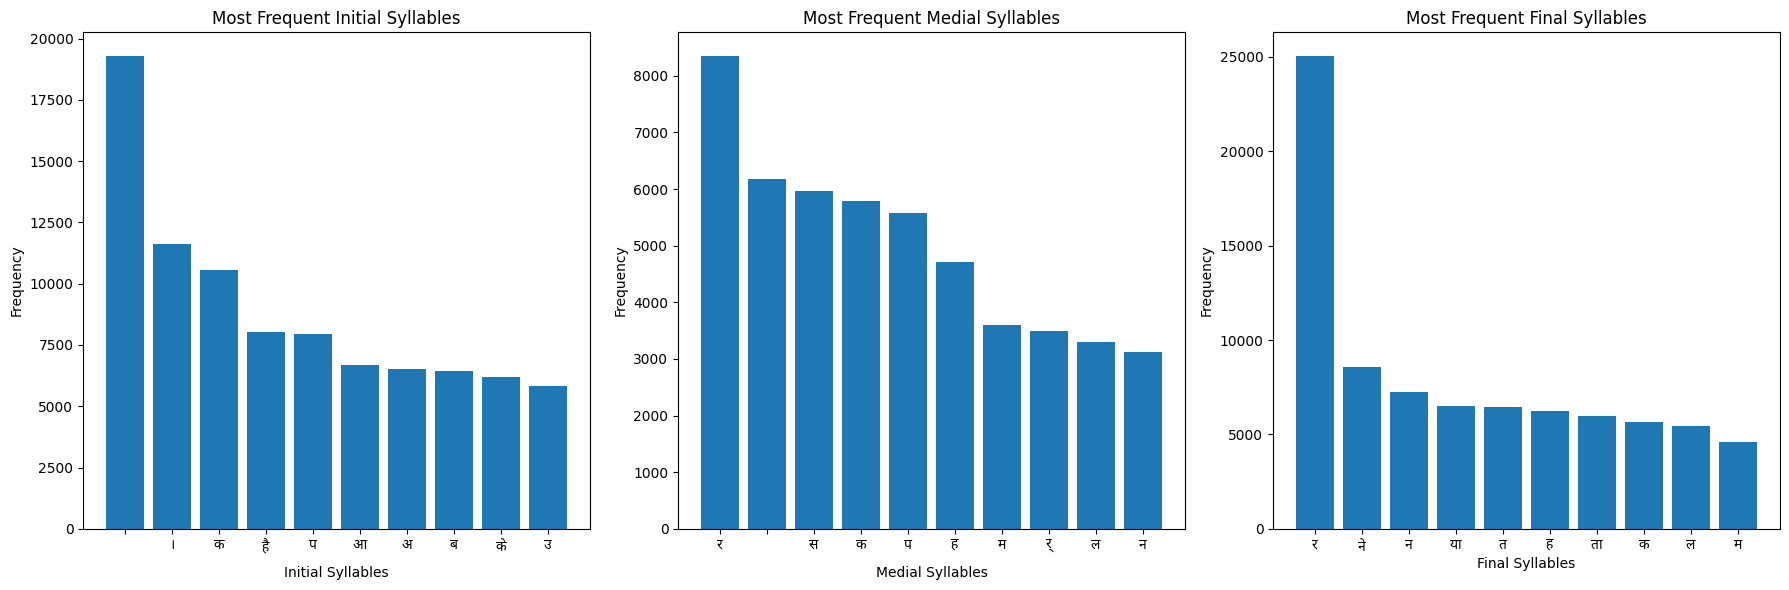

In [19]:
import matplotlib.pyplot as plt
# Plotting Most Frequent Initial, Medial, and Final Syllables in one plot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Initial Syllables
axs[0].bar(initial_labels, initial_counts)
axs[0].set_title('Most Frequent Initial Syllables')
axs[0].set_xlabel('Initial Syllables')
axs[0].set_ylabel('Frequency')
axs[0].set_xticklabels(initial_labels, fontproperties=font)

# Medial Syllables
axs[1].bar(medial_labels, medial_counts)
axs[1].set_title('Most Frequent Medial Syllables')
axs[1].set_xlabel('Medial Syllables')
axs[1].set_ylabel('Frequency')
axs[1].set_xticklabels(medial_labels, fontproperties=font)

# Final Syllables
axs[2].bar(final_labels, final_counts)
axs[2].set_title('Most Frequent Final Syllables')
axs[2].set_xlabel('Final Syllables')
axs[2].set_ylabel('Frequency')
axs[2].set_xticklabels(final_labels, fontproperties=font)

plt.tight_layout()
plt.show()


## Brown corpus

In [20]:
import nltk
from nltk.corpus import brown
nltk.download('brown')


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [21]:
categories = brown.categories()
print("Categories in Brown Corpus:", categories)

Categories in Brown Corpus: ['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [22]:
words_in_news = brown.words(categories='news')
print("First 20 words in 'news' category:", words_in_news[:20])

First 20 words in 'news' category: ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that']


In [23]:
words = brown.words(categories='adventure')
print("First 50 words in 'adventure' category:", words[:50])

First 50 words in 'adventure' category: ['Dan', 'Morgan', 'told', 'himself', 'he', 'would', 'forget', 'Ann', 'Turner', '.', 'He', 'was', 'well', 'rid', 'of', 'her', '.', 'He', 'certainly', "didn't", 'want', 'a', 'wife', 'who', 'was', 'fickle', 'as', 'Ann', '.', 'If', 'he', 'had', 'married', 'her', ',', "he'd", 'have', 'been', 'asking', 'for', 'trouble', '.', 'But', 'all', 'of', 'this', 'was', 'rationalization', '.', 'Sometimes']


In [24]:
sentences = brown.sents(categories='editorial')
print("First sentence in 'editorial' category:", ' '.join(sentences[0]))


First sentence in 'editorial' category: Assembly session brought much good


Most common words in 'news' category: [('the', 5580), (',', 5188), ('.', 4030), ('of', 2849), ('and', 2146), ('to', 2116), ('a', 1993), ('in', 1893), ('for', 943), ('The', 806)]


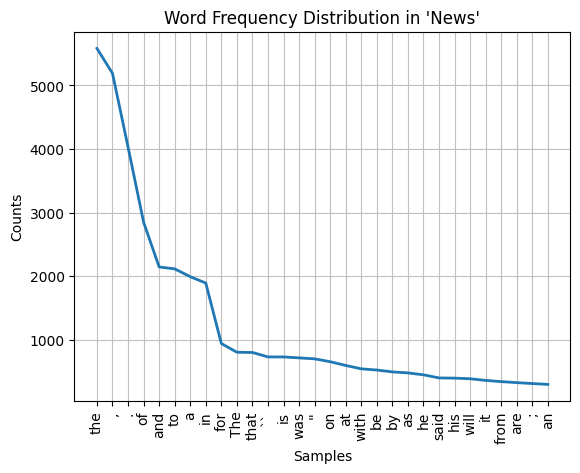

<Axes: title={'center': "Word Frequency Distribution in 'News'"}, xlabel='Samples', ylabel='Counts'>

In [25]:
from nltk import FreqDist

# Calculate frequency distribution of words in the 'news' category
fdist_news = FreqDist(words_in_news)

# Display the most common words
print("Most common words in 'news' category:", fdist_news.most_common(10))

# Plot the frequency distribution
fdist_news.plot(30, cumulative=False, title="Word Frequency Distribution in 'News'")


In [26]:
all_words = brown.words()
print("First 20 words in the entire Brown corpus:", all_words[:20])


First 20 words in the entire Brown corpus: ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that']


In [27]:
# Get all sentences in the Brown corpus
all_sentences = brown.sents()
print("First sentence in the entire Brown corpus:", ' '.join(all_sentences[0]))


First sentence in the entire Brown corpus: The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place .


Most common words in the entire Brown corpus: [('the', 62713), (',', 58334), ('.', 49346), ('of', 36080), ('and', 27915), ('to', 25732), ('a', 21881), ('in', 19536), ('that', 10237), ('is', 10011)]


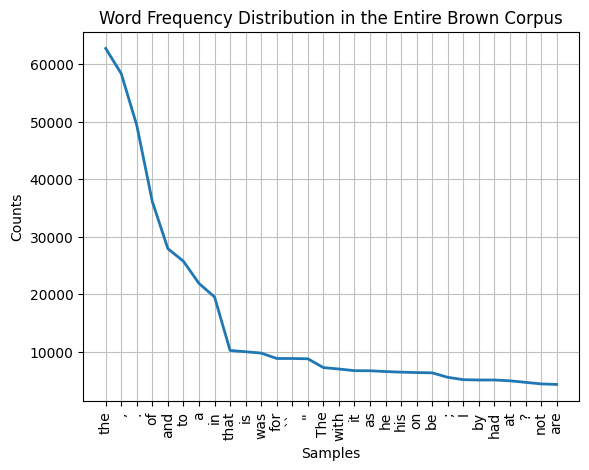

<Axes: title={'center': 'Word Frequency Distribution in the Entire Brown Corpus'}, xlabel='Samples', ylabel='Counts'>

In [28]:
# Calculate frequency distribution of all words
fdist_all = FreqDist(all_words)

# Display the most common words
print("Most common words in the entire Brown corpus:", fdist_all.most_common(10))

# Plot the frequency distribution
fdist_all.plot(30, cumulative=False, title="Word Frequency Distribution in the Entire Brown Corpus")


## Creating a custom *corpus*

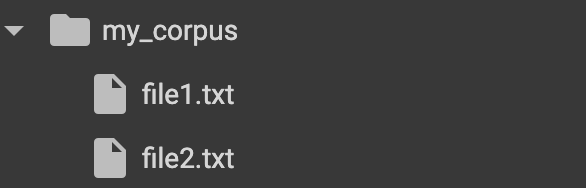

In [29]:
!git clone https://github.com/nlpcuom/English-Tamil-Parallel-Corpus/

Cloning into 'English-Tamil-Parallel-Corpus'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 60 (delta 24), reused 54 (delta 18), pack-reused 0
Receiving objects: 100% (60/60), 726.56 KiB | 3.44 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [30]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = '/content/English-Tamil-Parallel-Corpus/En-Ta Corpus/En-Ta Tamil.txt'
custom_corpus = PlaintextCorpusReader(corpus_root, '.*')

In [31]:
!mkdir my_corpus
!echo "This is the first file." > my_corpus/file1.txt
!echo "This is the second file with some more content." > my_corpus/file2.txt

In [32]:
!cp /content/English-Tamil-Parallel-Corpus/En-Ta\ Corpus/En-Ta\ Tamil.txt my_corpus/file1.txt

In [33]:
!cp /content/English-Tamil-Parallel-Corpus/En-Ta\ Glossary/glossary_tamil.txt my_corpus/file2.txt

In [34]:
corpus_root = '/content/my_corpus'  # Replace with the actual path
my_corpus = PlaintextCorpusReader(corpus_root, '.*')

# Explore the corpus
words = my_corpus.words()
sents = my_corpus.sents()
fileids = my_corpus.fileids()

print("First 50 words:", words[:50])
print("First sentence:", sents[0])
print("File IDs:", fileids)


First 50 words: ['#', 'NLPC', 'En', '-', 'Ta', 'Corpus', 'prepared', 'by', 'University', 'of', 'Moratuwa', '#', 'Line', 'Count', ':', '8950', '#', 'Version', '-', '1', '.', '0', '.', '3', 'ரணவ', 'ி', 'ர', 'ு', 'ச', 'ே', 'வ', 'ை', 'அத', 'ி', 'க', 'ா', 'ர', 'சப', 'ை', 'வர', 'ு', 'ட', 'ா', 'ந', '்', 'த', 'அற', 'ி', 'க', '்']
First sentence: ['#', 'NLPC', 'En', '-', 'Ta', 'Corpus', 'prepared', 'by', 'University', 'of', 'Moratuwa', '#', 'Line', 'Count', ':', '8950', '#', 'Version', '-', '1', '.', '0', '.', '3', 'ரணவ', 'ி', 'ர', 'ு', 'ச', 'ே', 'வ', 'ை', 'அத', 'ி', 'க', 'ா', 'ர', 'சப', 'ை', 'வர', 'ு', 'ட', 'ா', 'ந', '்', 'த', 'அற', 'ி', 'க', '்', 'க', 'ை', '2011', 'இல', '.']
File IDs: ['file1.txt', 'file2.txt']
